### **1. 인기곡(Popular)과 비인기곡(Unpopular)의 오디오 속성  분석**


In [2]:
import pandas as pd

df_pop=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\high_popularity_spotify_data.csv')
df_unpop=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\low_popularity_spotify_data.csv')
df_pop.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [2]:
df_unpop.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


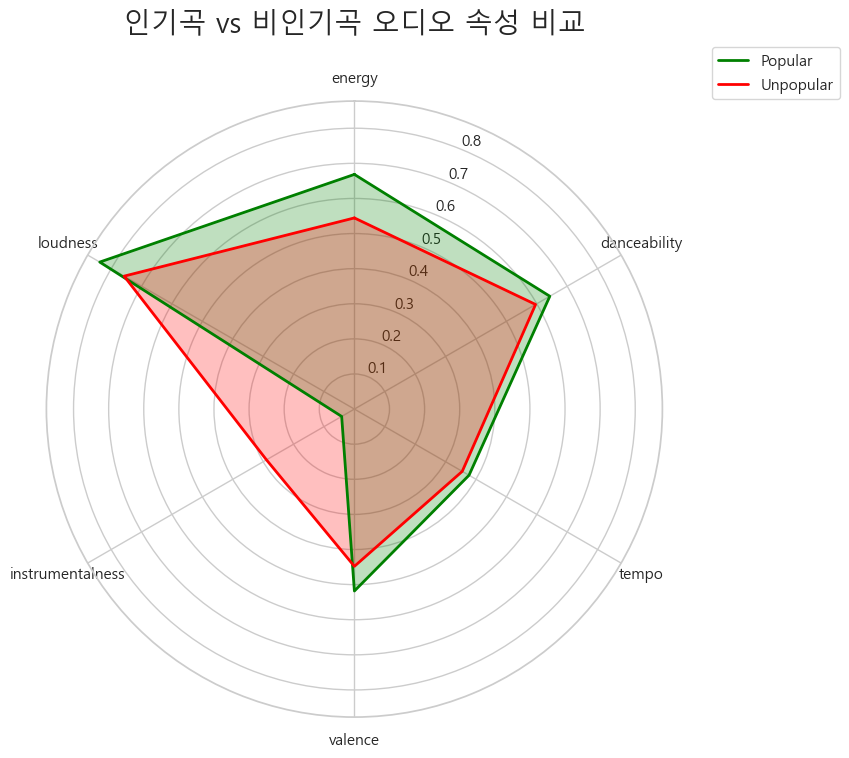

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


features = ['energy', 'danceability', 'tempo', 'valence', 'instrumentalness', 'loudness']

scaler = MinMaxScaler()

combined_features = pd.concat([df_pop[features], df_unpop[features]])
scaler.fit(combined_features)

pop_mean = pd.DataFrame(scaler.transform(df_pop[features]), columns=features).mean()
unpop_mean = pd.DataFrame(scaler.transform(df_unpop[features]), columns=features).mean()

labels = np.array(features)
num_vars = len(labels)

pop_values = np.concatenate((pop_mean.values, [pop_mean.values[0]]))
unpop_values = np.concatenate((unpop_mean.values, [unpop_mean.values[0]]))
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 인기곡 라인
ax.plot(angles, pop_values, color='green', linewidth=2, label='Popular')
ax.fill(angles, pop_values, color='green', alpha=0.25)

# 비인기곡 라인
ax.plot(angles, unpop_values, color='red', linewidth=2, label='Unpopular')
ax.fill(angles, unpop_values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('인기곡 vs 비인기곡 오디오 속성 비교', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

    - 결과
- energy, danceability, loudness, tempo 모두 인기곡들이 더 높음 -> 활동적인 상황(walking, gym)에 인기곡 추천하는 로직이 타당
- instrumentalness는 인기곡이 낮음(보컬위주) -> studying상황에서는 비인기곡(lo-fi)이 더 적합할 수도 있음
- valance는 인기곡이 더 높음 -> 대중은 전반적으로 밝은 곡을 선호함, stress 해소용으로 인기곡 리스트가 효과적임

---

### **2. 장르별 오디오 특징 분석**


--- 장르별 오디오 속성 평균 요약 ---


,energy,loudness,danceability,tempo,valence,acousticness,instrumentalness
playlist_genre,,,,,,,
metal,0.879122,-6.284265,0.446449,119.145633,0.410735,0.003894,0.084575
soca,0.853857,-4.851286,0.794929,123.315071,0.730786,0.145243,0.000747
punk,0.839243,-4.592324,0.489378,135.589865,0.574328,0.056122,0.001109
j-pop,0.823348,-4.648565,0.579652,130.397304,0.582522,0.133135,0.000534
funk,0.808714,-7.549429,0.709821,120.679250,0.644643,0.039573,0.388672
k-pop,0.747176,-4.147824,0.746235,121.003706,0.654941,0.108142,0.000005
rock,0.733916,-6.888029,0.546217,124.830403,0.570384,0.110793,0.044715
gospel,0.717205,-6.681179,0.534897,121.278821,0.476769,0.253755,0.008924
indie,0.715176,-6.252000,0.633235,114.490471,0.653294,0.094893,0.087938


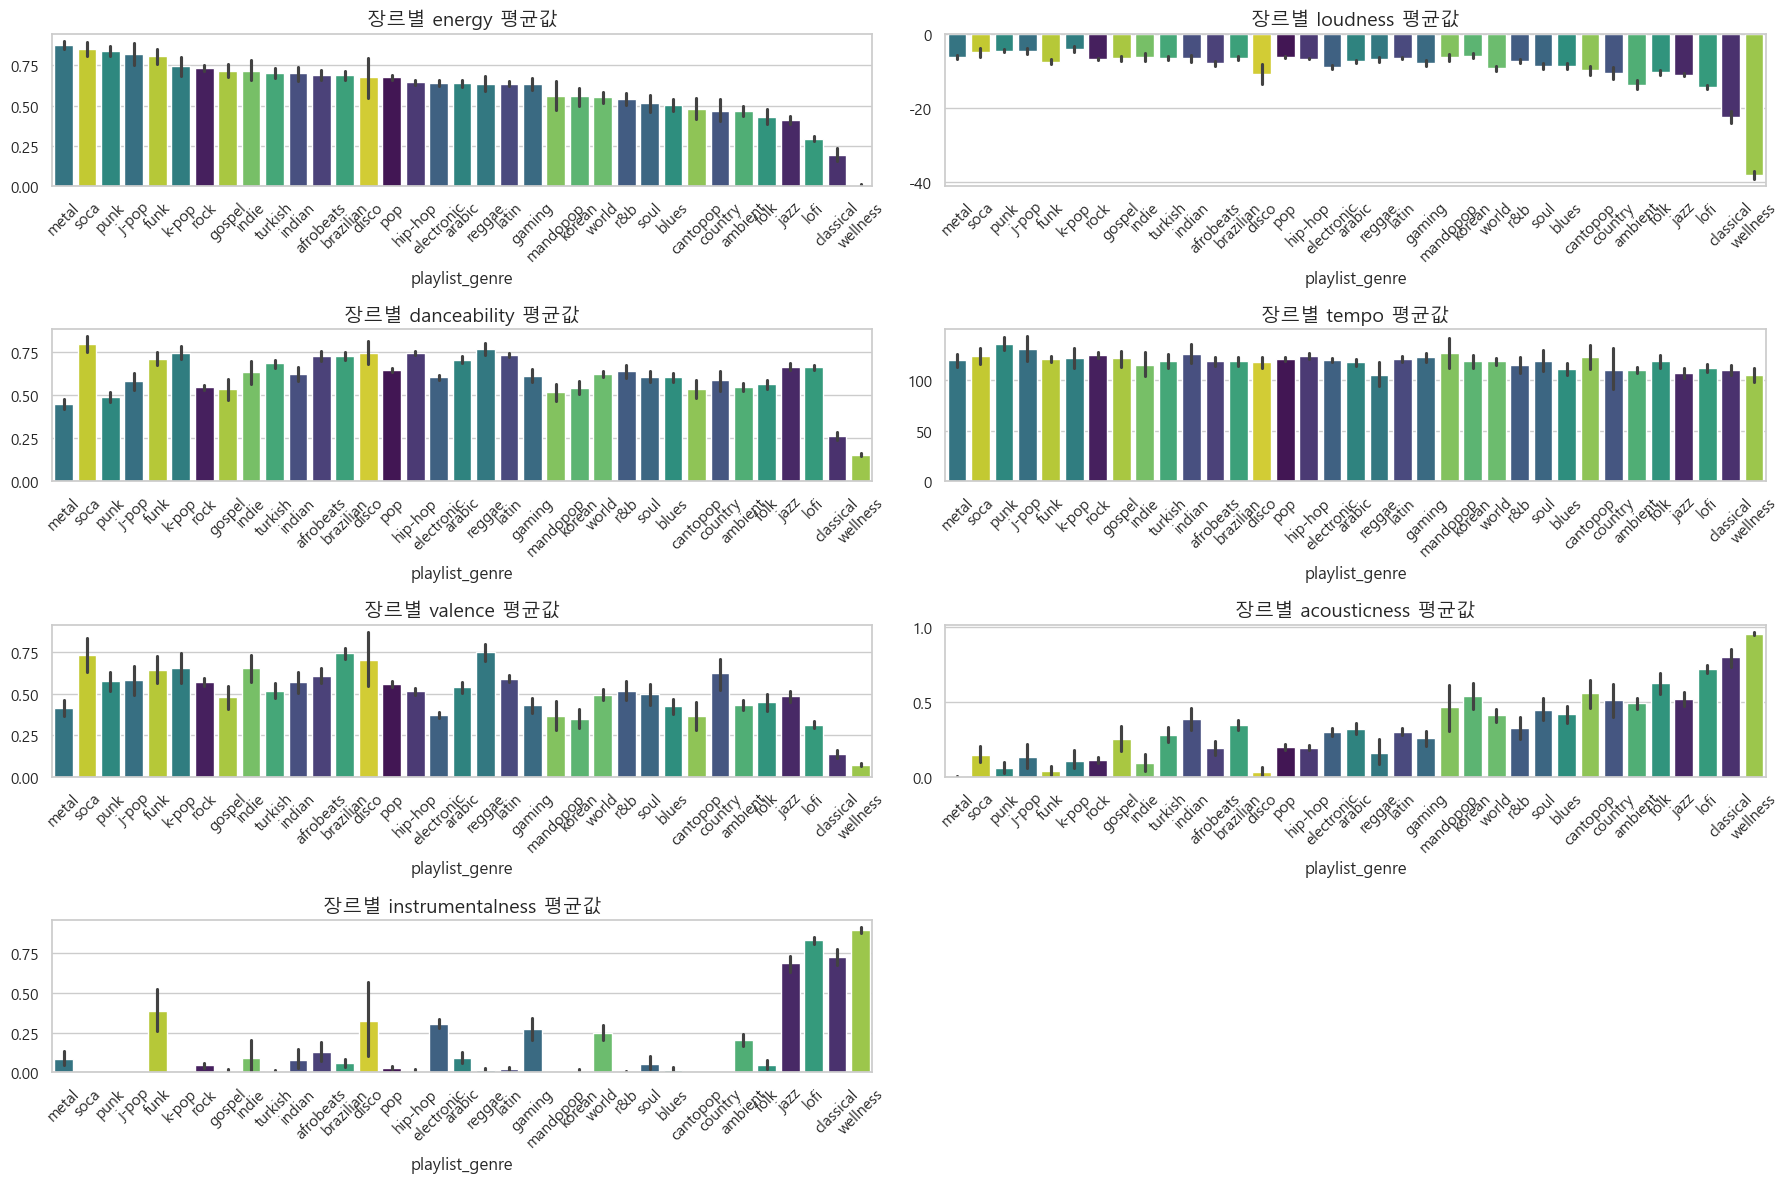

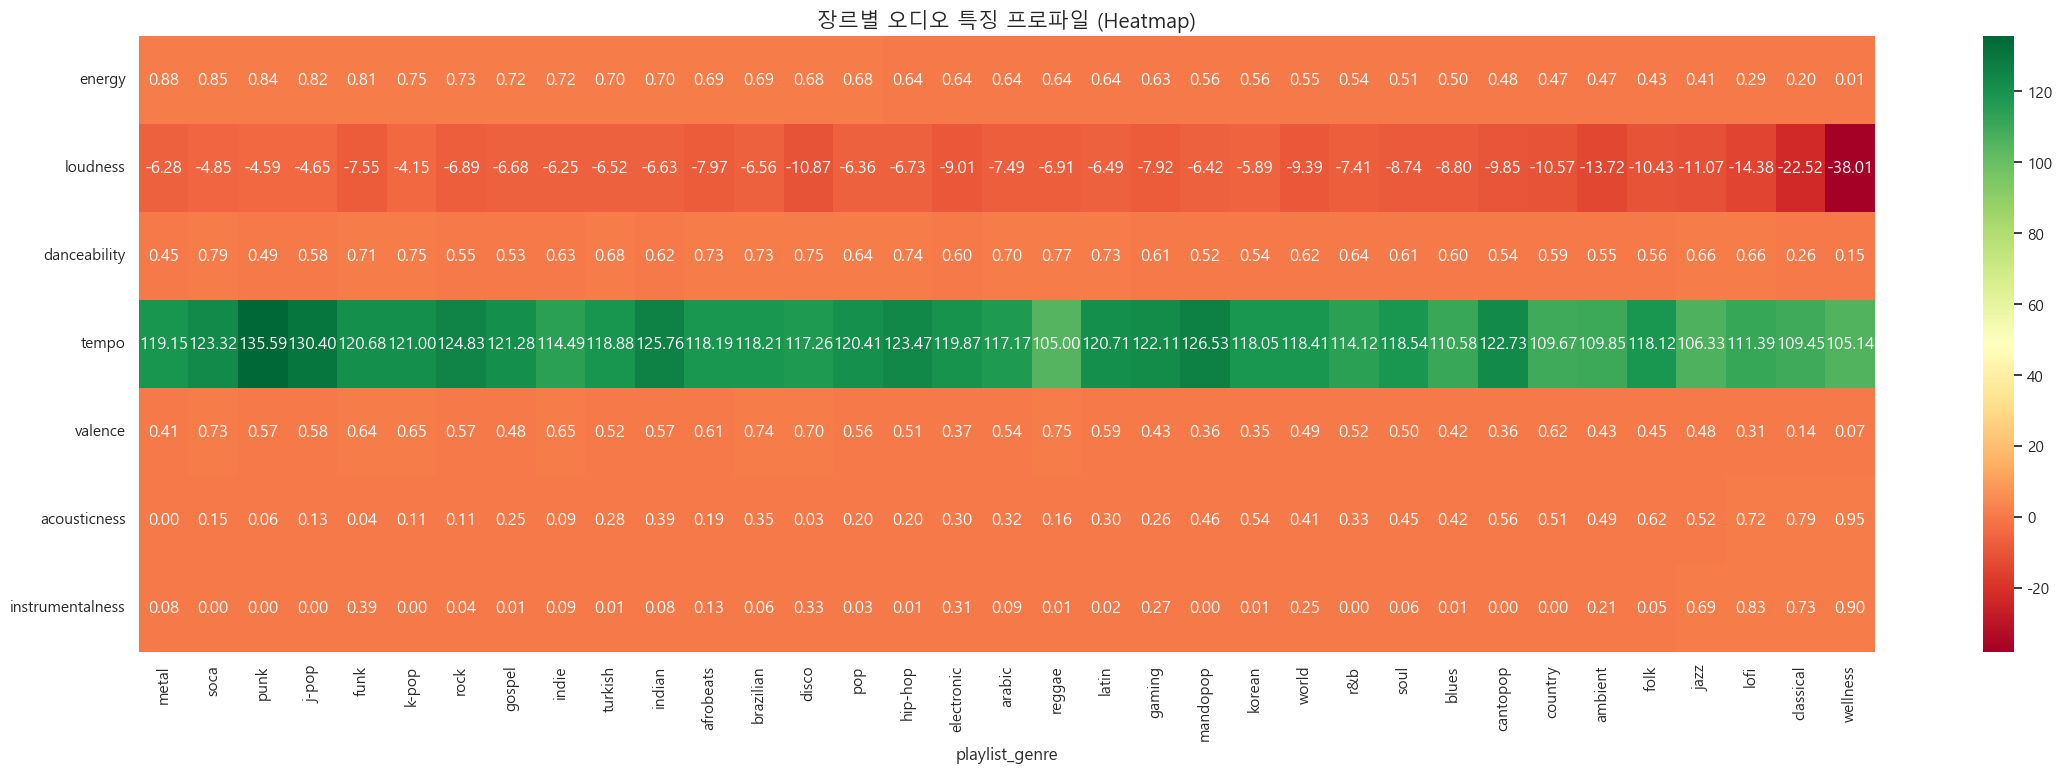

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_total = pd.concat([df_pop, df_unpop], ignore_index=True)

audio_features = ['energy', 'loudness', 'danceability', 'tempo', 'valence', 'acousticness', 'instrumentalness' ]

genre_summary = df_total.groupby('playlist_genre')[audio_features].mean().sort_values(by='energy', ascending=False)

print("--- 장르별 오디오 속성 평균 요약 ---")
display(genre_summary)

# 장르별 오디오 속성 비교 
plt.figure(figsize=(18, 12))

for i, feature in enumerate(audio_features):
    plt.subplot(4, 2, i+1)
    sns.barplot(data=df_total, x='playlist_genre', hue='playlist_genre', y=feature, palette='viridis', 
                order=genre_summary.index, legend=False)
    plt.title(f'장르별 {feature} 평균값', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('')

plt.tight_layout()
plt.show()

# 장르-속성 관계
plt.figure(figsize=(28, 8))
sns.heatmap(genre_summary.T, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('장르별 오디오 특징 프로파일 (Heatmap)', fontsize=15)
plt.show()


    - 결과(RAED Data_EDA의 사용자 상황과 매칭)
- Studying 상황매칭: 
    - 사용자 상황: 히트맵을 보면 studying은 주로 Cafe, Library, Study Room에서 발생합니다. 소음도는 약 43~48dB로 비교적 정적인 상태
    - 음악 매칭: energy가 0.01~0.29로 매우 낮고, instrumentalness(연주곡 성향)가 0.73~0.90으로 매우 높은 classical, lofi, wellness 장르가 눈에 띔.
        - 로직: 사용자가 학습 장소에 있고 소음이 50dB 이하라면, 가사가 없고 에너지가 낮은 Classical이나 Lofi를 최우선 추천
- Walking 상황 매칭:
    - 사용자 상황: walking은 Outdoor Campus, Park, Street에서 주로 발생하며, 활동량(motion_level)이 높고 소음도 또한 74~81dB로 높은 편
    - 음악 매칭: 
        - 장르별 바 차트를 보면 metal, pop, rock, hip-hop은 energy가 0.64 이상으로 높고 tempo가 빠름. 
        - 특히 pop이나 hip-hop은 danceability가 0.64 이상으로 높아 사용자의 높은 활동량과 리듬을 맞추기에 최적임.
            - 로직: 외부 활동 중이며 소음과 활동량이 높게 감지되면, 비트가 빠르고 에너지가 높은 Pop이나 Dance 장르를 추천
- Stressed 상황 매칭: 
    - 사용자 상황: stressed 상태는 Traffic, Crowded place, Meeting Room 등에서 빈번하며, 이때 소음도는 86~90dB로 매우 고통스러운 수준
    - 음악 매칭: 아이소-원리(Iso-principle):사용자의 현재 상태에 공감해 준 뒤, 서서히 원하는 상태로 이끌어가는 단계적 접근
        - 소음이 너무 큰 환경(Traffic 등)이라면 오히려 에너지가 매우 낮은 곡보다, 어느 정도 loudness가 있으면서도 사용자의 분노와 비슷한 에너지의 곡이 외부 소음을 차단하고 분노해소에 효과적임
        - 진정이 필요할 때는 valence(곡의 밝기)가 중요함. 장르별 히트맵에서 reggae, disco, soca은 valence가 0.70 이상으로 기분을 북돋아 주기에 좋음. 
            - 로직: 
            1. 감정폭발 직후, energy가 0.8 이상이고 loudness가 높은 Metal, punk, rock 장르 제안
            2. 그 후 에너지는 약간 낮추되 리듬감은 유지하는 Hip-hop/Funk 곡을 배치
            3. 마지막으로 밝고 긍정적인 곡으로 감정을 전환으로 valence가 높고 energy가 중간인 Pop, Reggae 혹은 아예 차분한 Jazz가 적합 
- Sleeping 상황 매칭:
    - 사용자 상황: sleeping은 Bedroom, Dorm Room에서 지배적이며 소음도는 27dB 내외로 극도로 낮음.
    - 음악 매칭: wellness 장르는 energy(0.01)와 loudness(-38.01)가 압도적으로 낮고, acousticness(0.95)는 최고치임, 이는 사용자의 극도로 조용한 환경과 완벽하게 일치
        - 로직: 로직: 심야 시간대이거나 Bedroom 위치에서 소음이 30dB 이하로 떨어지면, Wellness나 Ambient 장르를 자동으로 재생

    - 목표 확장(고소음의 스트레스, 저소음의 수면 사이의 중간 지점을 채우기 위함)

- Relax 상황 매칭:
    - 사용자 상황: sleeping보다는 소음과 활동량이 조금 높지만, walking보다는 낮은 상태
    - 음악 속성: Low Energy & High Acousticness: wellness 보다는 에너지가 있고 classical 보다는 리드미컬한 Jazz나 Acoustic 장르가 적합.
        - 로직: 활동량(motion_level)이 낮고 소음이 30~50dB 사이일 때, acousticness가 높은 곡을 우선 배치

- Consolation 상황 매칭:
    - 사용자 상황: stressed보다는 에너지가 낮지만, 침체된 기분을 끌어올려야 하는 상태, 환경 변수보다는 행동 패턴의 변화에 주목해야함
    - 음악 속성: 
        - High Valence (중요): 곡의 밝기를 나타내는 valence가 점진적으로 높아지는 곡들을 선택
        - Minor to Major: 처음에는 차분한 단조(Minor) 곡으로 공감을 주고, 점차 밝은 장조(Major) 곡으로 넘어가도록 mode 변수를 활용할 수 있음
            - 로직: valence 수치가 0.3에서 0.6으로 상승하는 곡들을 큐레이션하여 정서적 회복을 도움. Soul이나 R&B 장르가 이 영역에서 강점임
- Neutral 상황 매칭:
    - 사용자 상황: 소음, 온도, 활동량 등 모든 환경 변수가 평균치(Mean)에 수렴하는 상태 (일상적인 상태)
    - 음악 속성: 
        - Popularity (인기도): 이 상황에서는 특정 속성보다는 사용자가 평소 좋아하는 인기곡(track_popularity가 높은 곡) 위주로 편성하는 것이 가장 만족도가 높음
        - Moderate attributes: 모든 수치가 중간대(0.4~0.6)에 위치한 Pop 장르가 가장 무난함
            -  로직: 환경 변수에서 뚜렷한 특징(이상치)이 감지되지 않을 때, 사용자의 취향과 인기도가 반영된 메인스트림 팝(주류 팝)을 추천함

---

### **3. 데이터 매칭**

분석목적:

- RAED Data_사용자 상황의 수치와 Spotify Music Data_음악 속성의 수치를 직접 비교하여 실제 추천 엔진에 들어갈 임계값(Threshold)을 결정

In [6]:
df_pop=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\high_popularity_spotify_data.csv')
df_unpop=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\low_popularity_spotify_data.csv')
df1=pd.read_csv('C:\\Users\\seonu\\Documents\\soundscape-data\\EDA\\dataset\\RAED.csv')
df_total = pd.concat([df_pop, df_unpop], ignore_index=True)

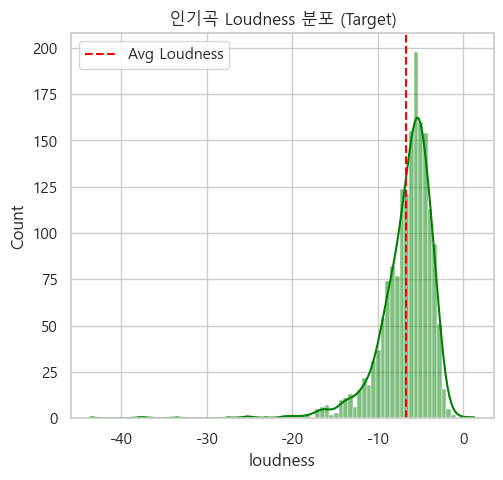

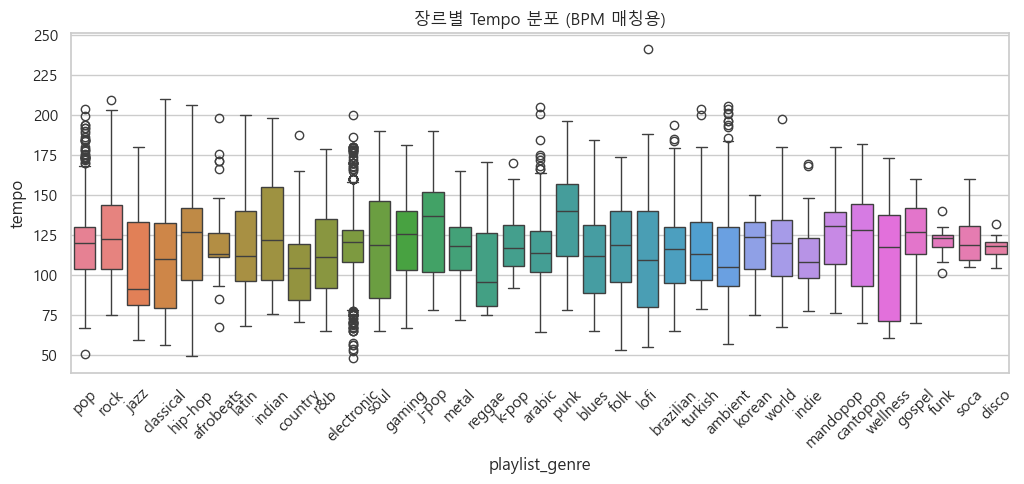

--- 행동별 환경 기반 추천 매칭 가이드 ---
[eating] 상황 (소음:67.6, 활동:4.0) -> 추천 전략: Moderate (Pop, R&B)
[sleeping] 상황 (소음:27.7, 활동:1.5) -> 추천 전략: Low Energy/High Acousticness (Classical, Lofi)
[stressed] 상황 (소음:87.5, 활동:6.5) -> 추천 전략: High Energy/Loudness (Rock, Metal, EDM)
[studying] 상황 (소음:44.7, 활동:2.5) -> 추천 전략: Moderate (Pop, R&B)
[walking] 상황 (소음:77.8, 활동:8.0) -> 추천 전략: High BPM (Pop, Hip-hop)


In [8]:
# 소음도와 Loudness 매칭 분석
high_noise_env = df1[df1['noise_db'] >= 80]
low_noise_env = df1[df1['noise_db'] <= 40]

# Spotify 데이터에서 인기곡들의 Loudness 분포 확인
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_pop['loudness'], kde=True, color='green')
plt.title('인기곡 Loudness 분포 (Target)')
plt.axvline(df_pop['loudness'].mean(), color='red', linestyle='--', label='Avg Loudness')
plt.legend()

# 활동성과 Tempo 매칭 분석
df1['activity_level'] = pd.cut(df1['motion_level'], bins=[0, 3, 7, 11], labels=['Low', 'Mid', 'High'])

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
sns.boxplot(data=df_total, x='playlist_genre', y='tempo', hue='playlist_genre')
plt.xticks(rotation=45)
plt.title('장르별 Tempo 분포 (BPM 매칭용)')
plt.tight_layout()
plt.show()

# 행동별 최적 장르 매칭 테이블 도출
beh_summary = df1.groupby('behaviour')[['noise_db', 'motion_level']].mean()

# 장르별 평균 energy와 loudness 추출
genre_summary = df_total.groupby('playlist_genre')[['energy', 'loudness', 'tempo']].mean()

print("--- 행동별 환경 기반 추천 매칭 가이드 ---")
for beh in beh_summary.index:
    noise = beh_summary.loc[beh, 'noise_db']
    motion = beh_summary.loc[beh, 'motion_level']
    
    if noise > 80:
        recommend = "High Energy/Loudness (Rock, Metal, EDM)"
    elif motion > 7:
        recommend = "High BPM (Pop, Hip-hop)"
    elif noise < 40:
        recommend = "Low Energy/High Acousticness (Classical, Lofi)"
    else:
        recommend = "Moderate (Pop, R&B)"
        
    print(f"[{beh}] 상황 (소음:{noise:.1f}, 활동:{motion:.1f}) -> 추천 전략: {recommend}")

    - 결과
- Spotify 인기곡의 평균 loudness는 약 -7dB 수준임. 외부 소음이 80dB를 넘어가면 음악의 섬세한 소리가 묻히기 때문에, 이 상황에서는 loudness가 -5dB 이상으로 압축(Compressed)된 곡이나 energy가 높은 곡을 우선 추천해야 사용자가 음악을 '선명하게' 들을 수 있음. -> 외부 소음이 80dB를 초과하는 고소음 환경(Traffic,Stressed 등)에서는 음악의 가청력을 확보하기 위해 loudness가 높은 곡을 우선 배치하는 '마스킹 로직'이 필요

- walking이나 active 목표 시 motion_level은 8~10 사이임 -> 사람의 보폭과 심박수에 맞춘 120~140 BPM(Tempo)의 음악이 활동성을 촉진함. Pop과 Latin 장르가 이 범위를 가장 잘 충족함